# Analyzing the linear frequency modulation using the Wigner-Ville distribution

last update: 9/30 (2017)

In [1]:
import DSP
using PyPlot

In [2]:
# include all modules in juwvid
include("../juwvid.jl")

juwvid

### CASE 1:  the linear FM signal whose amplitude is large

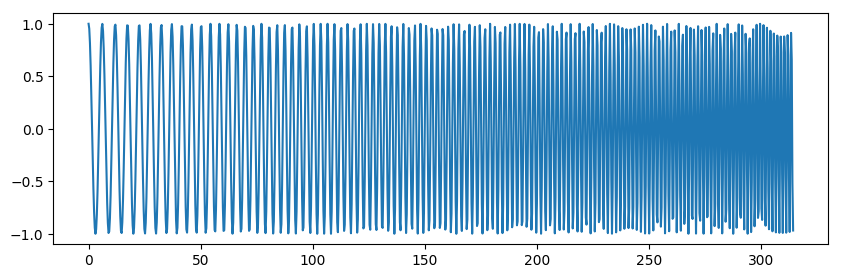

In [4]:
nsample=1024
x,y,iw,ynorm=sampledata.genlinfm(nsample,1.0,0.01);
fig=PyPlot.figure(figsize=(10,3))
PyPlot.plot(x,y)
PyPlot.savefig("linearFM.png")

In [4]:
### generating the analytic signal of y
zs=DSP.Util.hilbert(y); 

#### The Wigner-Ville distribution

In [5]:
tfrs=cohenclass.tfrwv(zs);

Single Wigner Ville
Use fft.


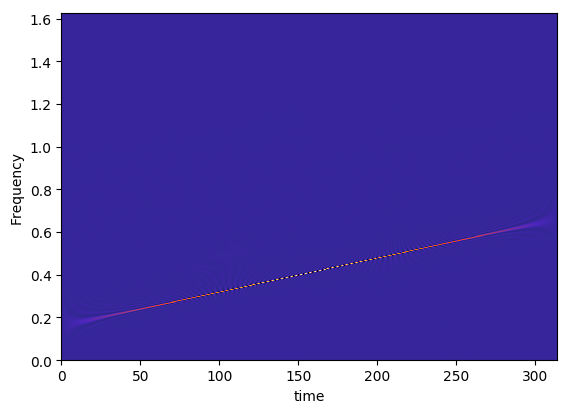

PyObject <matplotlib.text.Text object at 0x7faf621a4710>

In [6]:
a=juwplot.tfrshow(tfrs,x[2]-x[1],x[1],x[end])
#colorbar(a) # uncomment if you show a colorbar
PyPlot.xlabel("time")
PyPlot.ylabel("Frequency")

In [7]:
### extracting the instantaneous frequency (IF) from the TFR
indfs=extif.maxif(abs.(tfrs));
dx=x[2]-x[1]
if_ffts=juwutils.index_to_frequency(indfs,NaN,dx,nsample);

Assuming nft = nsample.


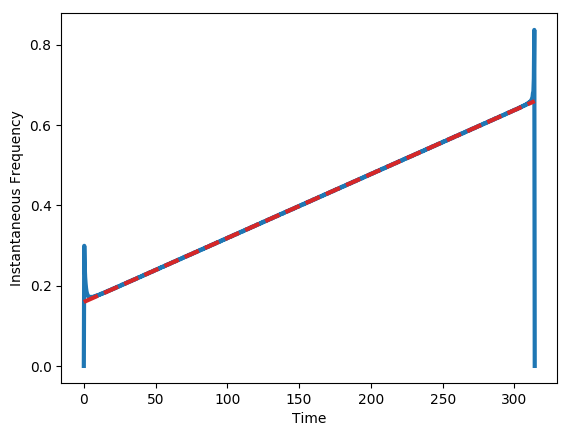

PyObject <matplotlib.text.Text object at 0x7faf621bba90>

In [8]:
### displaying the extracted IF
PyPlot.plot(x,if_ffts,color="C0",lw=3)
PyPlot.plot(x,iw/(2*pi),ls="dashed",color="C3",lw=3)
PyPlot.ylabel("Instantaneous Frequency")
PyPlot.xlabel("Time")

### Case 2: the linear FM whose amplitude is small

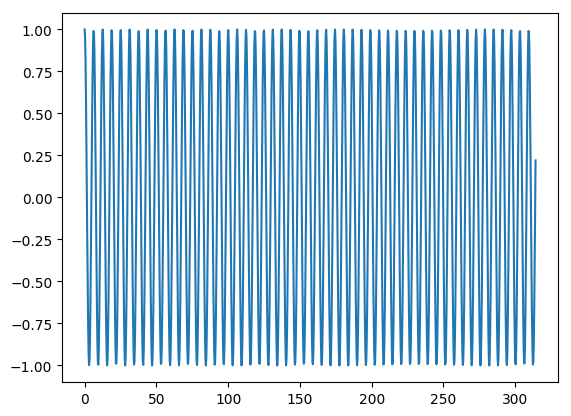

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7faf60bf1b00>

In [9]:
nsample=1024
x,y,iw,ynorm=sampledata.genlinfm(nsample,1.0,0.0001);
PyPlot.plot(x,y)

In [10]:
### z is the analytic signal of y
z=DSP.Util.hilbert(y); 

#### Wigner-Ville distribution with FFT

In [11]:
tfr=cohenclass.tfrwv(z);

Single Wigner Ville
Use fft.


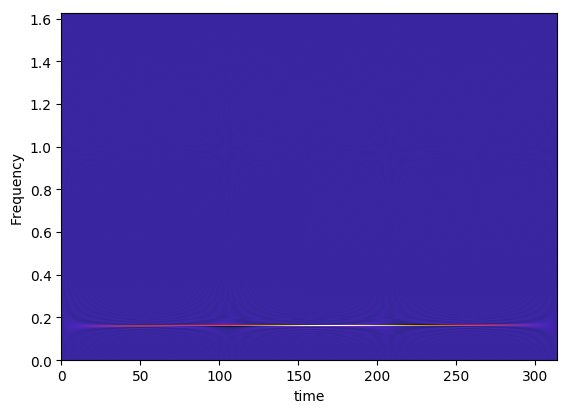

PyObject <matplotlib.text.Text object at 0x7faf60b95f60>

In [12]:
a=juwplot.tfrshow(tfr,x[2]-x[1],x[1],x[end])
PyPlot.xlabel("time")
PyPlot.ylabel("Frequency")
# Because the amplitude is small, you hardly see the modulation by eye. 

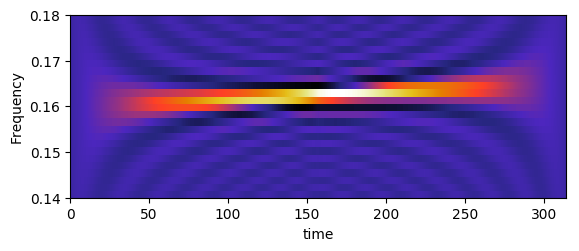

PyObject <matplotlib.text.Text object at 0x7faf60b05080>

In [13]:
# If you zoom up the TFR, you find that the resolution is poor because of the sampling rate.
a=juwplot.tfrshow(tfr,x[2]-x[1],x[1],x[end],NaN,NaN,15.0)
PyPlot.ylim(0.14,0.18)
PyPlot.xlabel("time")
PyPlot.ylabel("Frequency")

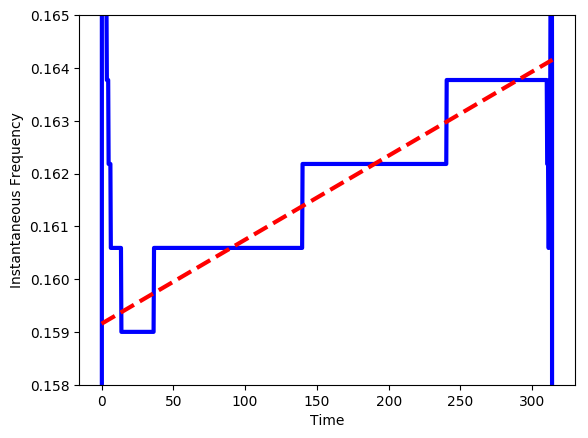

Assuming nft = nsample.


(0.158, 0.165)

In [14]:
### As shown in this figure, the FFT(DFT) cannot provide the sufficient resolution of the frequency.
indf=extif.maxif(abs.(tfr));
dx=x[2]-x[1]
if_fft=juwutils.index_to_frequency(indf,NaN,dx,nsample);
PyPlot.plot(x,if_fft,color="blue",lw=3)
PyPlot.plot(x,iw/(2*pi),ls="dashed",color="red",lw=3)
PyPlot.ylabel("Instantaneous Frequency")
PyPlot.xlabel("Time")
PyPlot.ylim(0.158,0.165)

### using Non-Uniform FFT

In [20]:
### Setting new frequency grid by dividing the frequency indices of f = 90 - 110 by 1024 grids
fin=collect(linspace(90,110,1024));
### Then, we compute the Wigner Ville distribution with the non-uniform FFT.
tfrnufft=cohenclass.tfrwv(z,NaN,NaN,fin,NaN,0);

Single Wigner Ville
Use nufft.


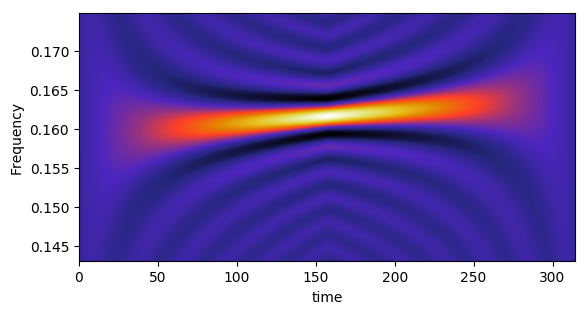

PyObject <matplotlib.text.Text object at 0x7faf60a26588>

In [18]:
a=juwplot.tfrshow(real(tfrnufft),x[2]-x[1],x[1],x[end],fin[1],fin[end],0.5)
PyPlot.xlabel("time")
PyPlot.ylabel("Frequency")

In [22]:
indnf=extif.maxif(abs.(tfrnufft));
dx=x[2]-x[1]
if_nufft=juwutils.index_to_frequency(indnf,fin,dx,nsample);

Assuming nft = nsample.


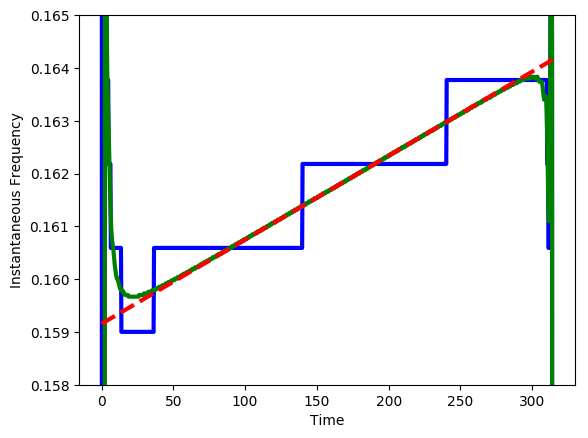

(0.158, 0.165)

In [23]:
PyPlot.plot(x,if_fft,color="blue",lw=3)
PyPlot.plot(x,if_nufft,color="green",lw=3)
PyPlot.plot(x,iw/(2*pi),ls="dashed",color="red",lw=3)
PyPlot.ylabel("Instantaneous Frequency")
PyPlot.xlabel("Time")
PyPlot.ylim(0.158,0.165)

Sufficient resolution with the Non-uniform FFT !  